$\textbf{Empirical Exercise-Week 2}$  Page 141, Problem 3.26
Lets look at the example from your book, related wages to experience in the world force.

In [13]:
clear all
addpath(genpath('c:\LeSage7'));
Tab1 = readtable('cps5_small.csv');

In [14]:
size(Tab1)
Tab1(1,:)


ans =

        1200          10


ans =

  1x10 table

    black    educ    exper    faminc    female    metro    midwest    south    wage     west
    _____    ____    _____    ______    ______    _____    _______    _____    _____    ____

      0       13      45        0         1         1         0         0      44.44     1  




In [31]:
wage = Tab1(:,9); exper = Tab1(:,3); metro = Tab1(:,6);
educ = Tab1(:,2);
wage1 = table2array(wage); exper1 = table2array(exper);
educ1 = table2array(educ);
metro1 = table2array(metro);
addpath(genpath('c:\LeSage7'));


In [17]:
yy = wage1; xx = [ones(1200,1) exper1];   % create regression variabels;
result1 = ols(yy,xx);   

In [18]:
yy = wage1; xx = [ones(1200,1) exper1 metro1];   % create regression variabels;
result11 = ols(yy,xx)


result11 = 

  struct with fields:

     meth: 'ols'
        y: [1200x1 double]
     nobs: 1200
     nvar: 3
     beta: [3x1 double]
     yhat: [1200x1 double]
    resid: [1200x1 double]
     sige: 227.0609
     bstd: [3x1 double]
     bint: [3x2 double]
    tstat: [3x1 double]
     rsqr: 0.0210
     rbar: 0.0194
       dw: 1.9807




In [19]:
[result11.beta result11.tstat]


ans =

   17.3891   13.2090
    0.0942    2.8680
    4.9279    4.3299




In [10]:
result11


result11 = 

  struct with fields:

     meth: 'ols'
        y: [1200x1 double]
     nobs: 1200
     nvar: 3
     beta: [3x1 double]
     yhat: [1200x1 double]
    resid: [1200x1 double]
     sige: 227.0609
     bstd: [3x1 double]
     bint: [3x2 double]
    tstat: [3x1 double]
     rsqr: 0.0210
     rbar: 0.0194
       dw: 1.9807




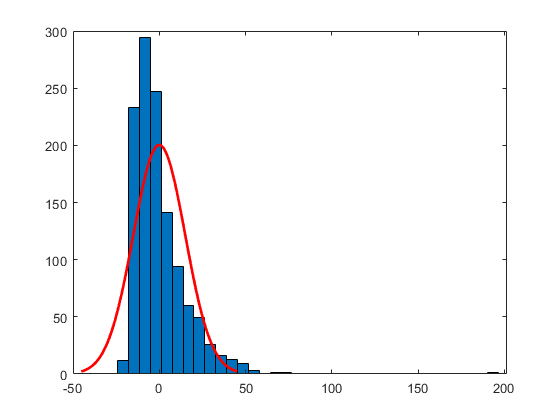

In [20]:
resid11 = result11.resid;
histfit(resid11)

In [21]:
[h, pval] = jbtest(resid11); warning off;
[h, pval]


> In jbtest (line 136)

ans =

    1.0000    0.0010




T stat for the coefficient is 2.61. We have 1200 observations and 2 regressors, so we have 1198 degress of freedom. We are asked to do a one-tailed test of significance.

In [34]:
help tcdf  %  Evaluate the p-value for the reported t-stat, 2.61, at 1198 degrees of freedom

 TCDF   Student's T cumulative distribution function (cdf).
    P = TCDF(X,V) computes the cdf for Student's T distribution
    with V degrees of freedom, at the values in X.
 
    The size of P is the common size of X and V. A scalar input
    functions as a constant matrix of the same size as the other input.
 
    P = TCDF(X,V,'upper') computes the upper tail probability of the
    Student's T distribution with V degrees of freedom, at the values in X.
 
    See also TINV, TPDF, TRND, TSTAT, CDF.

    Documentation for tcdf
       doc tcdf

    Other functions named tcdf

       gpuArray/tcdf




In [35]:
pval1 = tcdf(result11.tstat, 1198);

In [10]:
pval1


pval1 =

    1.0000
    0.9954




The pval1 gives the area to the left of the distributon. We look at the area to the right, the probability that the null of zero is true even though we reject it.  

In [36]:
pval = 1- pval1(2)


pval =

    0.0021




So at a one-tailed 5 percent test, we can reject the null hypothesis that the coefficeint of experience is zero. Next question: extract the data for metro1==1, do a regression for the folks living in a metro area. It is easy, see below.  We put the dummy for the metro1 in the first column, then create an indicator WhichRow for Metro1 == 1, then extract the rows and columns 2 to end from the Data matrix. 

In [41]:
Data = [metro1 yy xx(:,1:2)];  % Combine data set with metro1 and the y and x variables
WhichRow = Data(:,1)==1;   % Find indicator for metro1 = 1;
Data1 = Data(WhichRow,2:end);   % Extrat the data for metro1 == 1;
yyy = Data1(:,1); xxx = Data1(:,2:end);
result2 = ols(yyy,xxx);



In [42]:
[result2.beta result2.tstat]


ans =

   21.8886   21.4720
    0.1128    2.9360




In [22]:
who


Your variables are:

Tab1      ans       exper     exper1    h         metro     metro1    pval      resid11   result1   result11  wage      wage1     xx        yy        




In [24]:
help regress;

 REGRESS Multiple linear regression using least squares.
    B = REGRESS(Y,X) returns the vector B of regression coefficients in the
    linear model Y = X*B.  X is an n-by-p design matrix, with rows
    corresponding to observations and columns to predictor variables.  Y is
    an n-by-1 vector of response observations.
 
    [B,BINT] = REGRESS(Y,X) returns a matrix BINT of 95% confidence
    intervals for B.
 
    [B,BINT,R] = REGRESS(Y,X) returns a vector R of residuals.
 
    [B,BINT,R,RINT] = REGRESS(Y,X) returns a matrix RINT of intervals that
    can be used to diagnose outliers.  If RINT(i,:) does not contain zero,
    then the i-th residual is larger than would be expected, at the 5%
    significance level.  This is evidence that the I-th observation is an
    outlier.
 
    [B,BINT,R,RINT,STATS] = REGRESS(Y,X) returns a vector STATS containing, in
    the following order, the R-square statistic, the F statistic and p value
    for the full model, and an estimate of the error 

In [33]:
xx1 = [xx educ1];

We see that living in a metro area, experience has a strong effect that the total sample. How about the non-metro area?

In [43]:
Data = [metro1 yy xx(:,1:2)];  % Combine data set with metro1 and the y and x variables
WhichRow = Data(:,1)==0;   % Find indicator for metro1 = 1;
Data1 = Data(WhichRow,2:end);   % Extrat the data for metro1 == 0;
yyyy = Data1(:,1); xxxx = Data1(:,2:end);
result3 = ols(yyyy,xxxx);

In [44]:
[result3.beta result3.tstat]
save Week2_results


ans =

   19.4103   13.0462
    0.0132    0.2522




We see that living in a non-metro area means that experience has a much lower effect on wage and the effect is not statistically different from zero. So experience matters a lot more in metro areas than non-metro areas.

In [34]:
[B BINT R RINT STATS] = regress(yy,xx1);

In [35]:
[B BINT]


ans =

  -20.2204  -24.7536  -15.6872
    0.2044    0.1466    0.2622
    3.5272    1.5593    5.4952
    2.5477    2.2819    2.8135


